In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os

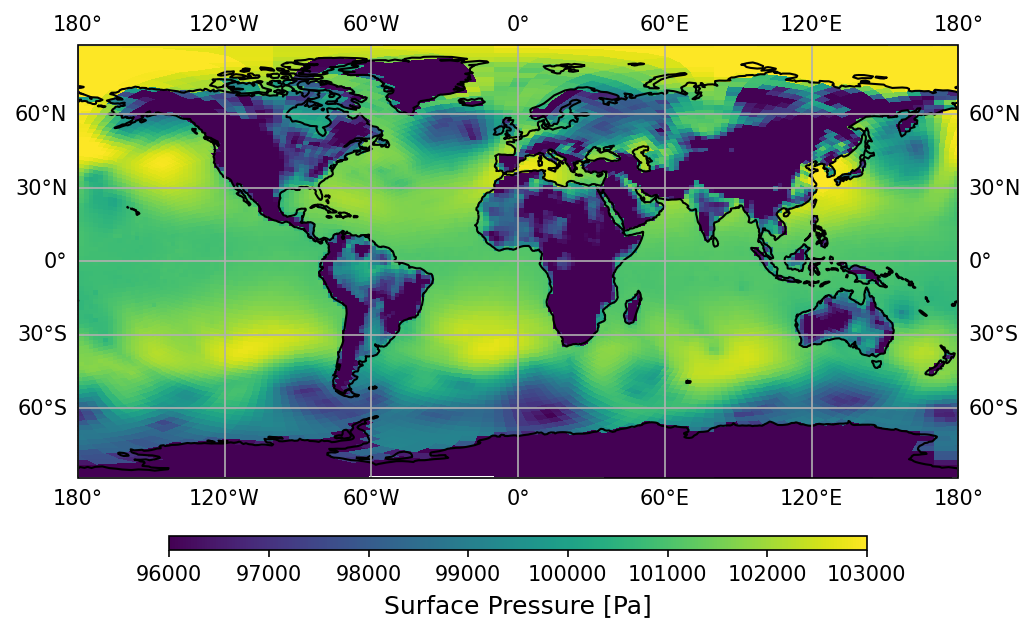

In [9]:
# plotting for tiled data
data_path = './SHiELD_IC/C48/20220101.00Z_IC'
grid_path = './my_grids/C48'

fig = plt.figure(figsize=(10,5), dpi=150)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.coastlines()

for i in range(1,7):
    file = 'gfs_data.tile'+str(i)+'.nc'
    f = os.path.join(data_path, file)
    ds = xr.open_dataset(f)
    variable = 'ps'
    pdata = ds[variable].values

    file = 'C48_oro_data.tile'+str(i)+'.nc'
    f = os.path.join(grid_path, file)
    ds_grid = xr.open_dataset(f)

    im = ax.pcolormesh(ds_grid.geolon, ds_grid.geolat, pdata, vmax=103000., vmin = 96000., transform = ccrs.PlateCarree())

cb = plt.colorbar(im, orientation='horizontal', pad = 0.1, shrink = 0.6, aspect=48)
cb.set_label(label='Surface Pressure [Pa]', fontsize=12)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


In [10]:
ds

<xarray.Dataset>
Dimensions:   (lat: 48, lon: 48, latp: 49, lonp: 49, lev: 65, levp: 66)
Coordinates:
    geolon    (lat, lon) float32 ...
    geolat    (lat, lon) float32 ...
    geolon_s  (latp, lon) float32 ...
    geolat_s  (latp, lon) float32 ...
    geolon_w  (lat, lonp) float32 ...
    geolat_w  (lat, lonp) float32 ...
Dimensions without coordinates: lat, lon, latp, lonp, lev, levp
Data variables: (12/16)
    ps        (lat, lon) float32 1.021e+05 1.022e+05 ... 1.017e+05 1.018e+05
    w         (lev, lat, lon) float32 ...
    zh        (levp, lat, lon) float32 ...
    t         (lev, lat, lon) float32 ...
    delp      (lev, lat, lon) float32 ...
    sphum     (lev, lat, lon) float32 ...
    ...        ...
    snowwat   (lev, lat, lon) float32 ...
    graupel   (lev, lat, lon) float32 ...
    u_w       (lev, lat, lonp) float32 ...
    v_w       (lev, lat, lonp) float32 ...
    u_s       (lev, latp, lon) float32 ...
    v_s       (lev, latp, lon) float32 ...
Attributes:
    source:   FV3GFS GAUSSIAN NETCDF FILE

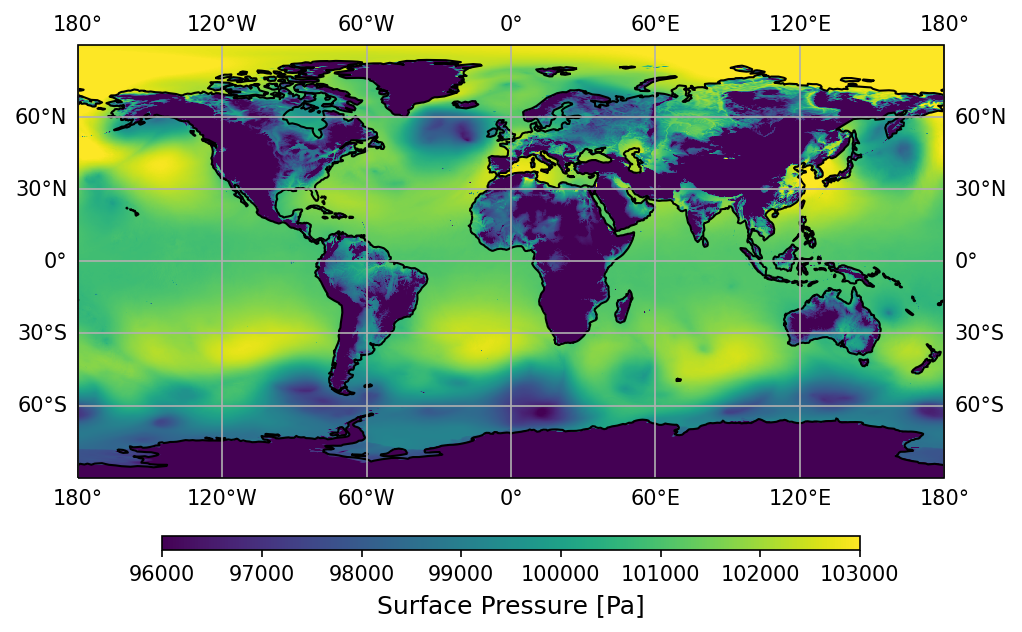

In [36]:
# plotting for one single netcdf file, e.g., GFS analysis
data_path = './GFSvOPER/2022010100'

fig = plt.figure(figsize=(10,5), dpi=150)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.coastlines()

file = 'gfs.t00z.atmanl.nc'
f = os.path.join(data_path, file)
ds = xr.open_dataset(f)

variable = "pressfc"
pdata = ds[variable].isel(time=0).values

im = ax.pcolormesh(ds.lon, ds.lat, pdata, vmax=103000., vmin = 96000., transform = ccrs.PlateCarree())

cb = plt.colorbar(im, orientation='horizontal', pad = 0.1, shrink = 0.6, aspect=48)
cb.set_label(label='Surface Pressure [Pa]', fontsize=12)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
